In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ROSN_211205_220305.csv', sep=";").rename(columns=lambda name: name [1:-1].lower())
df

,ticker,per,date,time,close
0,ROSN,60,20211206,80000,581.60
1,ROSN,60,20211206,90000,581.00
2,ROSN,60,20211206,100000,580.70
3,ROSN,60,20211206,110000,580.05
4,ROSN,60,20211206,120000,571.75
...,...,...,...,...,...
961,ROSN,60,20220225,200000,303.60
962,ROSN,60,20220225,210000,300.85
963,ROSN,60,20220225,220000,299.60
964,ROSN,60,20220225,230000,302.00


## Подсчёт скользящего среднего по 8 значениям

In [3]:
window_size = 8
df['MA'] = df.close.rolling(window_size).mean()
df.loc[7:]

,ticker,per,date,time,close,MA
7,ROSN,60,20211206,150000,576.70,576.66875
8,ROSN,60,20211206,160000,572.65,575.55000
9,ROSN,60,20211206,170000,572.30,574.46250
10,ROSN,60,20211206,180000,572.40,573.42500
11,ROSN,60,20211206,190000,572.10,572.43125
...,...,...,...,...,...,...
961,ROSN,60,20220225,200000,303.60,297.15625
962,ROSN,60,20220225,210000,300.85,297.48750
963,ROSN,60,20220225,220000,299.60,298.69375
964,ROSN,60,20220225,230000,302.00,300.81250


## График

In [4]:
import matplotlib.pyplot as plt

<AxesSubplot:>

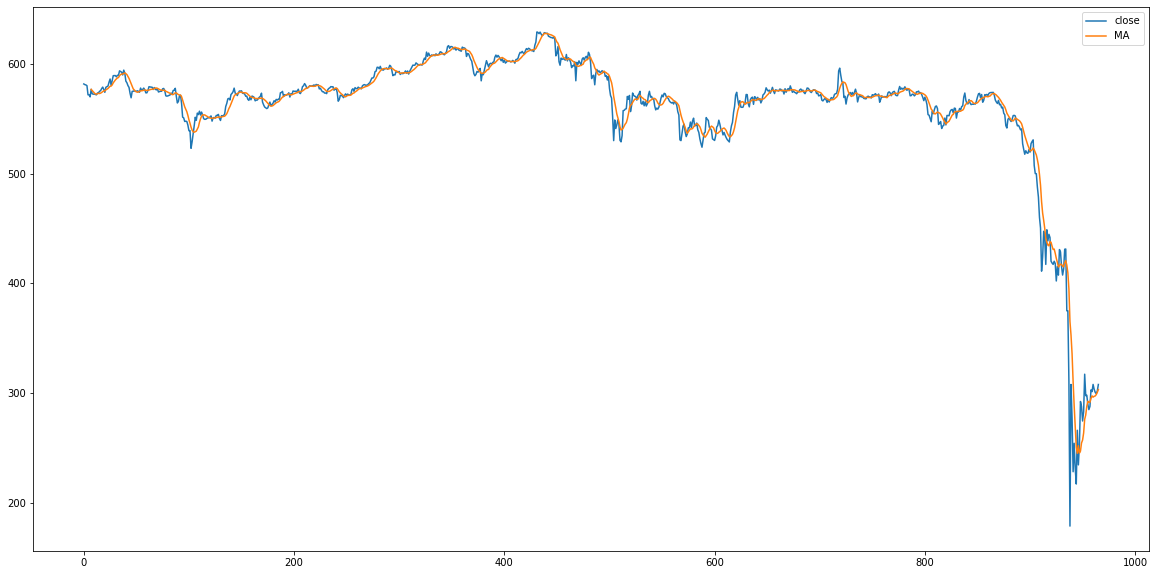

In [5]:
df[['close', 'MA']].plot(figsize=(20, 10))

## Программа, использующая MA для покупки и продажи акций

In [6]:
default_money = 100
profit = default_money
bought = False
for (average, price) in zip(df.MA, df.close):
    if price >= average and not bought:
        profit -= price
        bought = True
    elif price <= average and bought:
        profit += price
        bought = False
print('Профит:', profit)
print('Эффективность:', (profit - default_money) / default_money)

Профит: -369.2000000000002
Эффективность: -4.692000000000002


### Модификация

In [7]:
df['MA2'] = df.close.rolling(3).mean()
df['MA15'] = df.close.rolling(15).mean()
default_money = 100
profit = default_money
bought = False
for (average2, average8, price) in zip(df.MA2, df.MA15, df.close):
    if average8 <= average2 and not bought:
        profit -= price
        bought = True
    elif average8 >= average2 and bought:
        profit += price
        bought = False
print('Профит:', profit)
print('Эффективность:', (profit - default_money) / default_money)

Профит: -327.4499999999998
Эффективность: -4.274499999999998


## Индекс силы

In [8]:
df2 = pd.read_csv("ROSN_211205_220305_1.csv").rename(columns=lambda name: name [1:-1].lower())
df2.head(10)

,ticker,per,date,time,close,vol
0,ROSN,D,20211206,0,575.55,3715475
1,ROSN,D,20211207,0,589.55,7751532
2,ROSN,D,20211208,0,574.95,8777660
3,ROSN,D,20211209,0,578.35,4300435
4,ROSN,D,20211210,0,572.10,2667972
5,ROSN,D,20211213,0,539.15,8615617
6,ROSN,D,20211214,0,550.85,9993779
7,ROSN,D,20211215,0,561.10,4992591
8,ROSN,D,20211216,0,573.00,7112994
9,ROSN,D,20211217,0,573.20,4598269


In [9]:
df2['fi'] = df2.vol * df2.close.diff()

In [10]:
df2.head()

,ticker,per,date,time,close,vol,fi
0,ROSN,D,20211206,0,575.55,3715475,NaN
1,ROSN,D,20211207,0,589.55,7751532,1.085214e+08
2,ROSN,D,20211208,0,574.95,8777660,-1.281538e+08
3,ROSN,D,20211209,0,578.35,4300435,1.462148e+07
4,ROSN,D,20211210,0,572.10,2667972,-1.667482e+07


In [11]:
df2['ema2'] = df2.fi.ewm(min_periods=2, span=2, adjust=False).mean()
df2['ema13'] = df2.fi.ewm(min_periods=13, span=13, adjust=False).mean()
# df2.dropna(inplace=True)
df2['should_buy'] = (df2.ema2 < 0) & (df2.ema13 > 0)
df2.head(20)

,ticker,per,date,time,close,vol,fi,ema2,ema13,should_buy
0,ROSN,D,20211206,0,575.55,3715475,NaN,NaN,NaN,False
1,ROSN,D,20211207,0,589.55,7751532,1.085214e+08,NaN,NaN,False
2,ROSN,D,20211208,0,574.95,8777660,-1.281538e+08,-4.926207e+07,NaN,False
3,ROSN,D,20211209,0,578.35,4300435,1.462148e+07,-6.673039e+06,NaN,False
4,ROSN,D,20211210,0,572.10,2667972,-1.667482e+07,-1.334090e+07,NaN,False
5,ROSN,D,20211213,0,539.15,8615617,-2.838846e+08,-1.937034e+08,NaN,False
6,ROSN,D,20211214,0,550.85,9993779,1.169272e+08,1.338369e+07,NaN,False
7,ROSN,D,20211215,0,561.10,4992591,5.117406e+07,3.857727e+07,NaN,False
8,ROSN,D,20211216,0,573.00,7112994,8.464463e+07,6.928884e+07,NaN,False
9,ROSN,D,20211217,0,573.20,4598269,9.196538e+05,2.370938e+07,NaN,False


In [12]:
df2['should_sold'] = (df2.ema2 > 0) & (df2.ema13 < 0)
df2

,ticker,per,date,time,close,vol,fi,ema2,ema13,should_buy,should_sold
0,ROSN,D,20211206,0,575.55,3715475,NaN,NaN,NaN,False,False
1,ROSN,D,20211207,0,589.55,7751532,1.085214e+08,NaN,NaN,False,False
2,ROSN,D,20211208,0,574.95,8777660,-1.281538e+08,-4.926207e+07,NaN,False,False
3,ROSN,D,20211209,0,578.35,4300435,1.462148e+07,-6.673039e+06,NaN,False,False
4,ROSN,D,20211210,0,572.10,2667972,-1.667482e+07,-1.334090e+07,NaN,False,False
5,ROSN,D,20211213,0,539.15,8615617,-2.838846e+08,-1.937034e+08,NaN,False,False
6,ROSN,D,20211214,0,550.85,9993779,1.169272e+08,1.338369e+07,NaN,False,False
7,ROSN,D,20211215,0,561.10,4992591,5.117406e+07,3.857727e+07,NaN,False,False
8,ROSN,D,20211216,0,573.00,7112994,8.464463e+07,6.928884e+07,NaN,False,False
9,ROSN,D,20211217,0,573.20,4598269,9.196538e+05,2.370938e+07,NaN,False,False


In [13]:
df2.should_buy.value_counts()

False    54
True      3
Name: should_buy, dtype: int64

In [14]:
default_money = 100
profit = default_money
bought = False
for (should_buy, price) in zip(df2.should_buy, df2.close):
    if should_buy and not bought:
        profit -= price
        bought = True
    elif not should_buy and bought:
        profit += price
        bought = False
print('Профит:', profit)
print('Эффективность:', (profit - default_money) / default_money)

Профит: 99.25000000000011
Эффективность: -0.0074999999999988635


In [15]:
default_money = 100
profit = default_money
bought = 0
sold = 0
for (should_buy, should_sold, price) in zip(df2.should_buy, df2.should_sold, df2.close):
    if should_buy:
        profit -= price
        bought += 1
    elif should_sold and bought > sold:
        profit += price
        sold += 1
print('Профит:', profit)
print('Эффективность:', (profit - default_money) / default_money)
print(f'{bought=}')
print(f'{sold=}')

Профит: 52.250000000000114
Эффективность: -0.47749999999999887
bought=3
sold=3


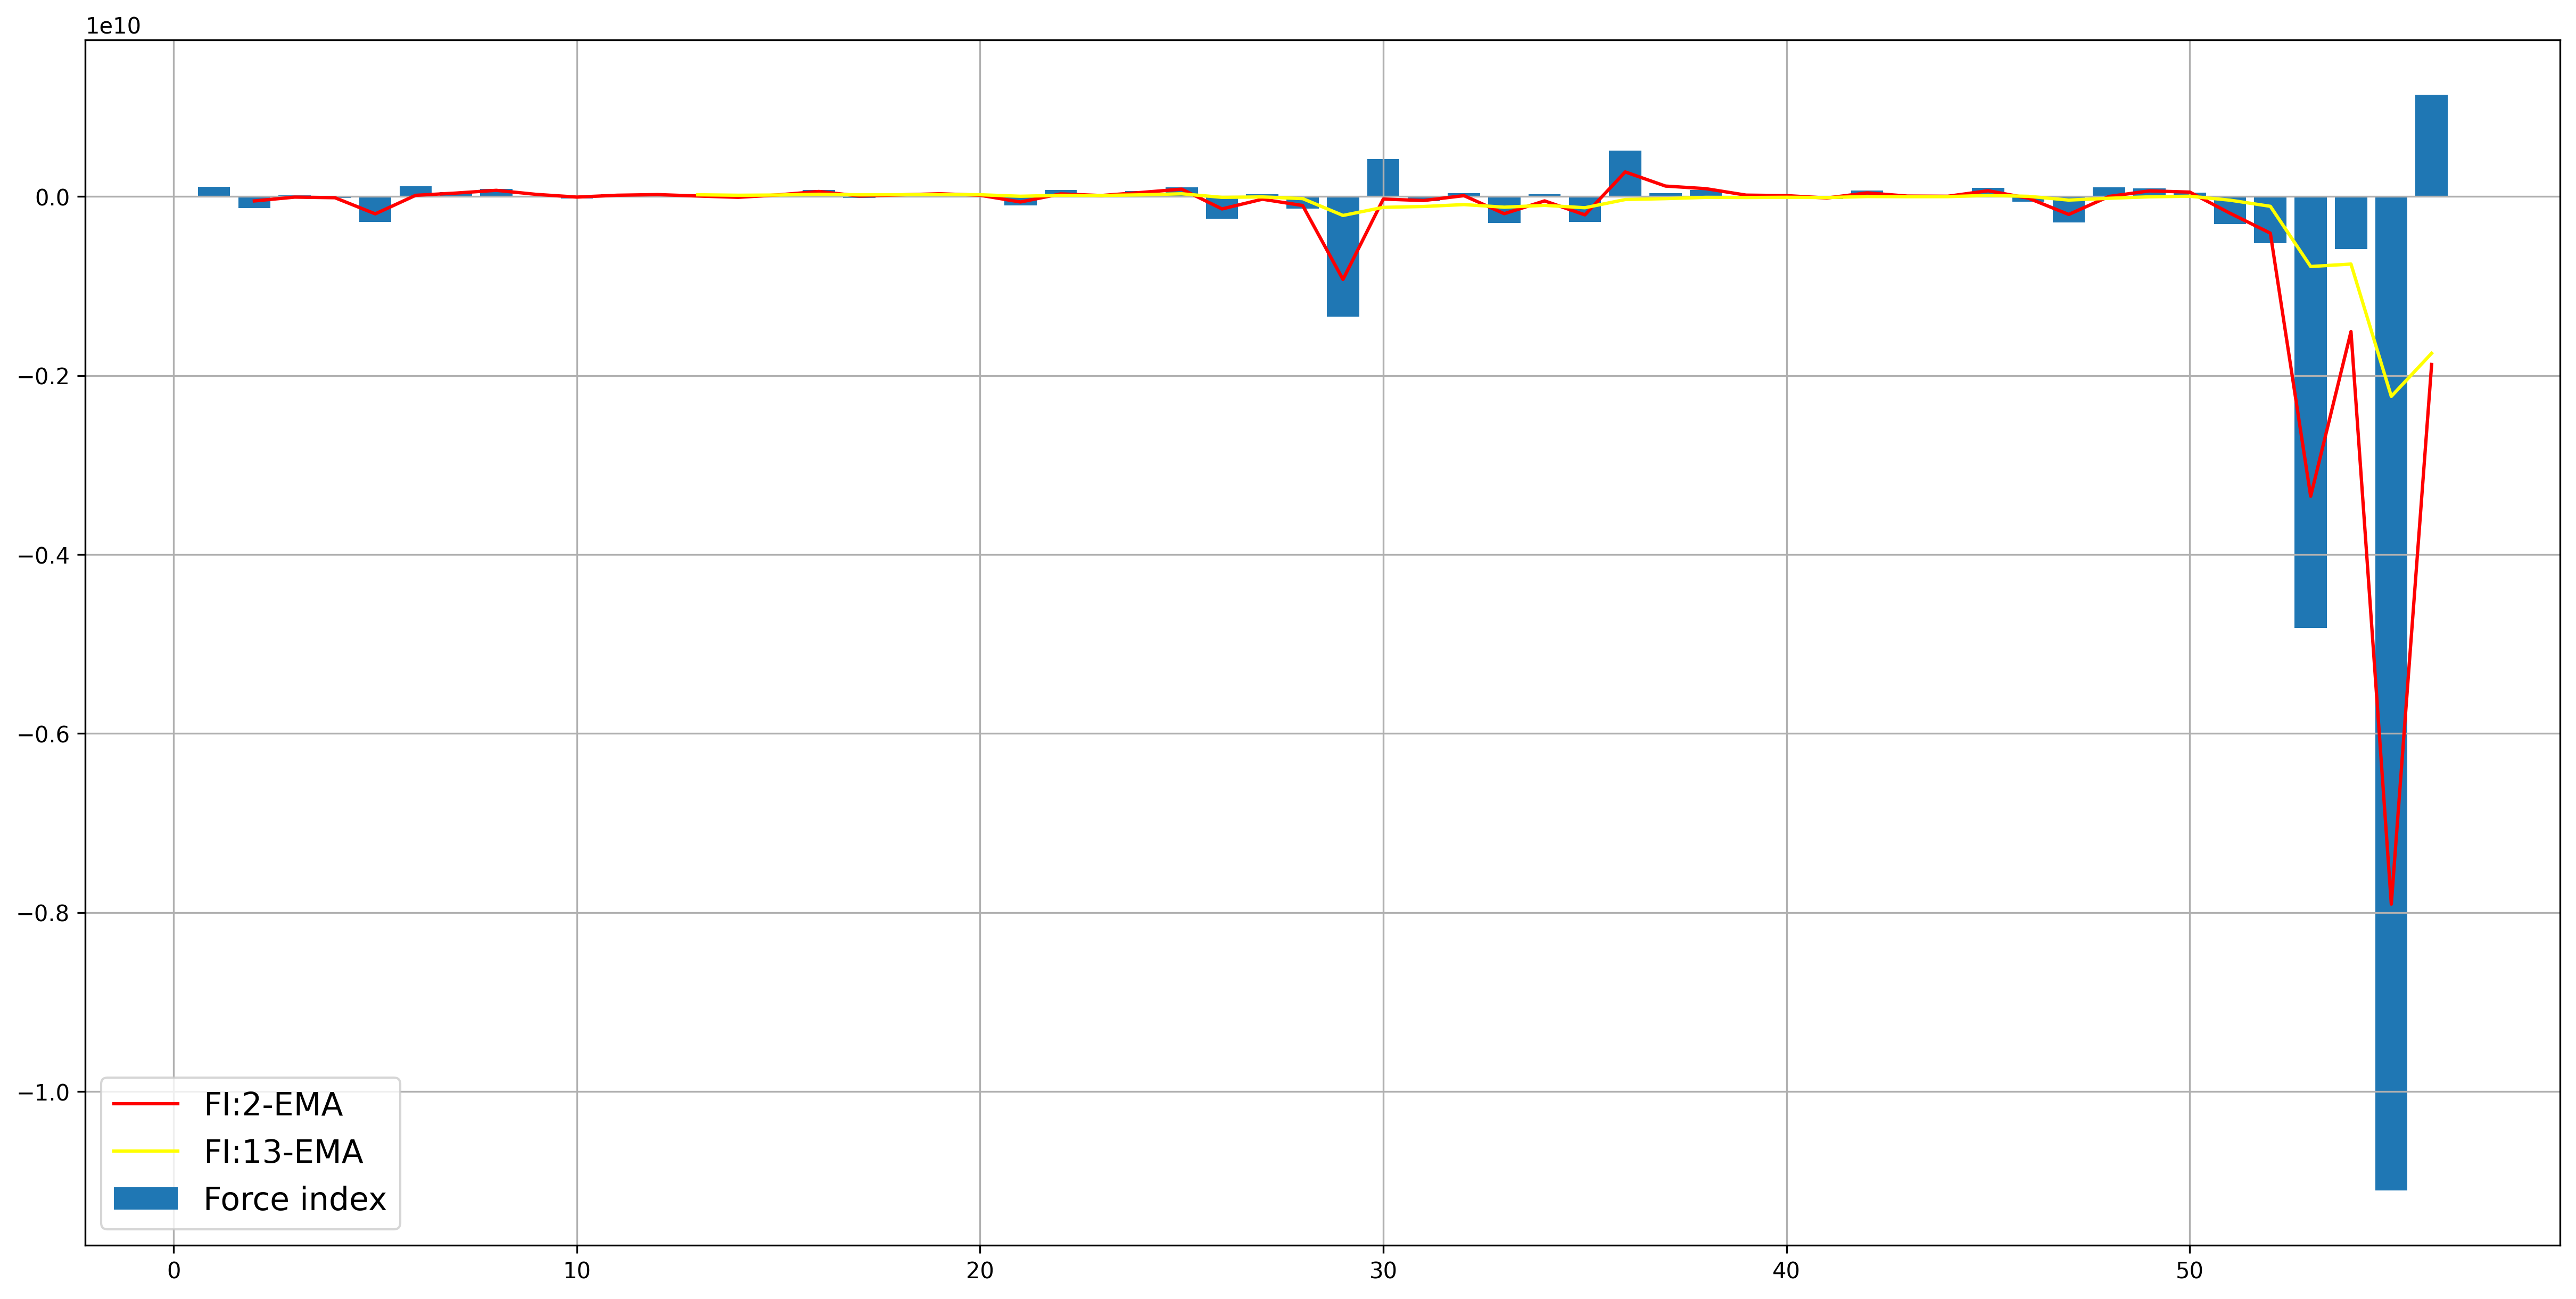

In [16]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
ax.grid(True, 'both')
x = df2.axes[0][:]
ax.bar(x, df2.fi[:], label='Force index')
ax.plot(x, df2.ema2[:], label='FI:2-EMA', color='red')
ax.plot(x, df2.ema13[:], label='FI:13-EMA', color='yellow')
legend = ax.legend(shadow=False, fontsize='x-large')

## Futures

In [17]:
futures_df = pd.read_csv("SNGS_210901_211231.csv") \
    .rename(columns=lambda name: name[1:-1].lower()) \
    .drop("time", axis = 1)

futures_df

FileNotFoundError: [Errno 2] No such file or directory: 'SNGS_210901_211231.csv'

In [ ]:
shares_1_sep = futures_df[futures_df["date"] == 20210901]["close"].iloc[0]
shares_1_sep*1000

In [ ]:
futures_11_oct = 40620

In [ ]:
shares_16_dec = futures_df[futures_df["date"] == 20211216]["close"].iloc[0]
shares_16_dec*1000

In [ ]:
futures_16_dec = 38408

In [ ]:
profit = shares_16_dec*1000 - shares_1_sep*1000 + futures_11_oct - futures_16_dec
profit